<a href="https://colab.research.google.com/github/naga-sk/DataScienceTraining-Assignments/blob/main/Team%20practice/Walmart-Store-Sales/WalmartStoreSales_kaggle_teampractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/naga-sk/DataScienceTraining-Assignments/main/Team%20practice/Walmart-Store-Sales/Walmart_Store_sales.csv")

In [2]:
df.head()
# All values are numeric except date

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()
# Note that 'Date' is the only object. The rest are numeric values
# Of these numeric values, Store is the only discrete numeric values
# Holiday_Flag is one hot encoded categorical value  
# All other numeric values (Weekly Sales, Temperature, Fuel Price, CPI, Unemployment)
# etc are all contiguous values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# In the summary above, all the stores have values for all columns. 

# We could also doublecheck for nulls.
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [15]:
# Set this so that large float numbers are displayed as floats with 2 decimal precision
# instead of scientific format with exponential
pd.set_option('display.float_format','{:.2f}'.format)

In [8]:
df.describe()
# Several basic observations can be made with the data below
# Store is a discrete value. Not much to infer there. 
# Holiday_Sales is one-hot encoded. Nothing to see there either. 
# CPI and Fuel-price values seem to be normally distributed
# Weekly Sales, Temperate and Unemployment seem to have a large range and prone to outliers

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [11]:
# Let us first get the average sales from all stores for regular weeks and holiday weeks

pv = pd.pivot_table(df, index=["Store"], columns=["Holiday_Flag"], aggfunc={"Weekly_Sales":"mean"})
pv

Weekly_Sales           
Holiday_Flag            0          1
Store                               
1              1546957.39 1665747.66
2              1914208.81 2079266.90
3               400064.85  437811.05
4              2083555.84 2243102.62
5               314892.28  359501.61
6              1555992.87 1680907.93
7               562964.45  672400.27
8               903743.40  975330.86
9               540599.33  588950.82
10             1883309.43 2113755.95
11             1349464.98 1448394.48
12              999291.92 1138140.42
13             1995392.98 2113043.81
14             2013489.33 2120583.00
15              617064.84  706406.02
16              515677.36  566733.65
17              887099.02  979796.97
18             1078349.72 1169422.16
19             1435070.64 1577046.73
20             2097048.43 2249035.08
21              750774.18  826491.31
22             1024262.42 1084874.66
23             1384399.96 1462542.29
24             1347857.43 1475098.25
25              704243.69  739676.84
26              997713.72 1072046.85
27             1766412.96 1892299.28
28             1311888.98 1478244.60
29              534375.76  606957.89
30              438708.96  436859.31
31             1388072.52 1500026.03
32             1163769.96 1203784.08
33              259656.22  262594.52
34              961127.69 1041978.09
35              908099.15 1074348.46
36              373953.45  367640.63
37              519755.56  507525.05
38              386049.08  381509.88
39             1443114.79 1551127.48
40              960826.83 1008034.07
41             1263101.18 1334947.86
42              555554.97  567694.16
43              633127.61  635946.28
44              303253.62  296035.60
45              782198.53  836293.71

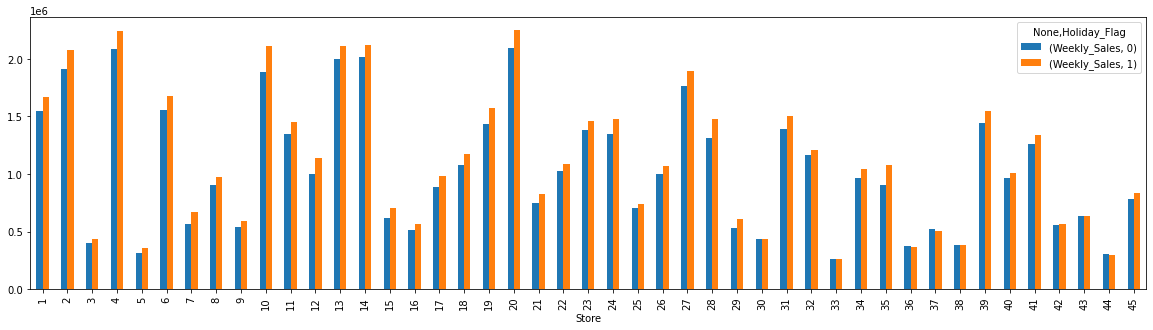

In [15]:
pv.plot.bar(figsize=(20,5))

#Inferences
#1. Holidays sales is always higher in all stores
#2. The average sales across all stores varies widely (330,000 upto 2,210,000). 

# To be determined
# 1. Possibility of categorizing stores according to average sales in order to 
# potentially study and apply correlation between the store categories
# 2. What is the correlation between weekly sales and the combination of 
# fuel_price, Temperate, CPI and Unemployment?

In [18]:
import numpy as np
df.CPI.apply(np.mean)

0      211.10
1      211.24
2      211.29
3      211.32
4      211.35
        ...  
6430   192.01
6431   192.17
6432   192.33
6433   192.33
6434   192.31
Name: CPI, Length: 6435, dtype: float64

In [21]:
list(df.columns)

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [28]:
new_list = [1] * 10
print(new_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [29]:
# def categorize(s):

df['Store_Category'] = [0] * len(df)

In [30]:
list(df.columns)

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Store_Category']

In [31]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_Category
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11,0
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11,0
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11,0
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11,0
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11,0


In [35]:
def categorize(s):
  #print(s)
  if(s["Weekly_Sales"] <= 500000): return "low"
  elif(500000 < s["Weekly_Sales"] <= 1000000): return "medium"
  elif(1000000 < s["Weekly_Sales"] <= 1500000): return "high"
  else: return "super"

df['Store_Category'] = df.apply(categorize, axis=1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_Category
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11,super
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11,super
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11,super
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11,high
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11,super


In [4]:
# For the purpose of store categorization, first create a pivot table of 
# average weekly_sales of each store

pv_store = pd.pivot_table(df, index=["Store"], aggfunc={"Weekly_Sales":"mean"})
pv_store

,Weekly_Sales
Store,
1,1.555264e+06
2,1.925751e+06
3,4.027044e+05
4,2.094713e+06
5,3.180118e+05
6,1.564728e+06
7,5.706173e+05
8,9.087495e+05
9,5.439806e+05


In [46]:
pv_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 45
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  45 non-null     float64
dtypes: float64(1)
memory usage: 720.0 bytes


In [53]:
pv_store.loc[1]

Weekly_Sales   1555264.40
Name: 1, dtype: float64

In [5]:
# Create a new column named "Store_category" and assign small, medium, high, super
# based on average sales
def categorize(s):
  #print(s)
  if(s["Weekly_Sales"] <= 500000): return "low"
  elif(500000 < s["Weekly_Sales"] <= 1000000): return "medium"
  elif(1000000 < s["Weekly_Sales"] <= 1500000): return "high"
  else: return "super"

pv_store['Store_Category'] = pv_store.apply(categorize, axis=1)

In [56]:
pv_store.head()

,Weekly_Sales,Store_Category
Store,,
1,1555264.40,super
2,1925751.34,super
3,402704.44,low
4,2094712.96,super
5,318011.81,low


In [57]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_Category
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11,super
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11,super
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11,super
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11,high
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11,super


In [6]:
# Merge with the source dataframe to assign store category
new_df = df.merge(pv_store, how='left', on=["Store"])

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           6435 non-null   int64  
 1   Date            6435 non-null   object 
 2   Weekly_Sales_x  6435 non-null   float64
 3   Holiday_Flag    6435 non-null   int64  
 4   Temperature     6435 non-null   float64
 5   Fuel_Price      6435 non-null   float64
 6   CPI             6435 non-null   float64
 7   Unemployment    6435 non-null   float64
 8   Weekly_Sales_y  6435 non-null   float64
 9   Store_Category  6435 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 553.0+ KB


In [8]:
new_df.head()

,Store,Date,Weekly_Sales_x,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_y,Store_Category
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1.555264e+06,super
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1.555264e+06,super
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1.555264e+06,super
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1.555264e+06,super
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1.555264e+06,super


In [9]:
new_df.drop(["Weekly_Sales_y"], inplace=True, axis=1)

In [12]:
new_df.rename(columns={"Weekly_Sales_x":"Weekly_Sales"}, inplace=True)

In [13]:
new_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_Category
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,super
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,super
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,super
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,super
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,super


In [16]:
new_df[{"Store","Store_Category","Weekly_Sales"}].groupby(['Store_Category']).mean()

,Weekly_Sales,Store
Store_Category,,
high,1252147.72,25.08
low,354450.01,27.00
medium,712935.99,26.44
super,1883041.47,10.78


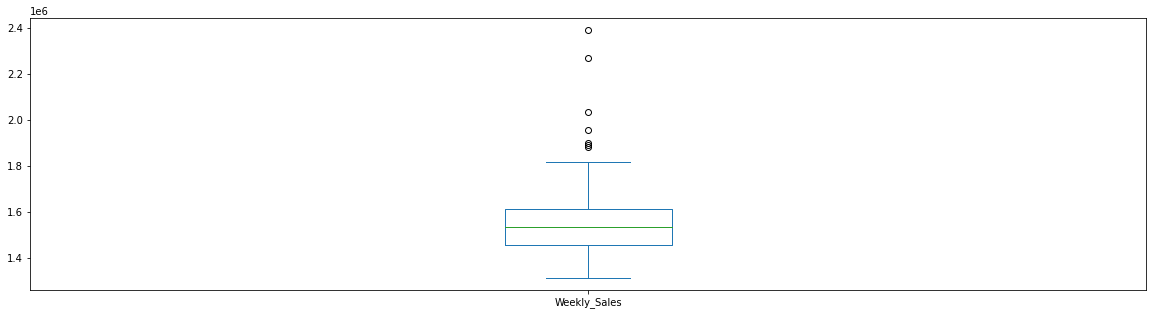

In [17]:
df["Weekly_Sales"][df.Store == 1].plot.box(figsize=(20,5))

In [46]:
box_pv = pd.pivot_table(df, index=['Date'], columns=["Store"], values=["Weekly_Sales"])
box_pv

Weekly_Sales                                                       \
Store                1          2         3          4         5          6    
Date                                                                           
01-04-2011   1495064.75 1800171.36 374556.08 1900246.47 314316.55 1459276.77   
01-06-2012   1624477.58 1910092.37 432268.53 2179360.94 359867.80 1681121.38   
01-07-2011   1488538.09 1866243.00 368962.72 2051533.53 327093.89 1694551.15   
01-10-2010   1453329.50 1827440.43 358784.10 1842821.02 283178.12 1328468.89   
02-03-2012   1688420.76 1952555.66 469752.56 2206319.90 359206.21 1550385.65   
...                 ...        ...       ...        ...       ...        ...   
30-07-2010   1371986.60 1804246.16 347955.05 1796637.61 268929.03 1532308.78   
30-09-2011   1394561.83 1650394.44 368477.93 1929486.63 292315.38 1307551.92   
30-12-2011   1497462.72 1874226.52 410553.88 2007105.86 349624.88 1598080.52   
31-08-2012   1582083.40 1947083.30 408838.73 2081181.35 344642.01 1577439.81   
31-12-2010   1367320.01 1750434.55 382677.76 1794868.74 298180.18 1464050.02   

                                                     ...                      \
Store             7         8         9          10  ...        36        37   
Date                                                 ...                       
01-04-2011 513409.67 878762.30 520962.14 1827733.18  ... 385672.11 534578.78   
01-06-2012 598495.02 921161.20 583648.59 1767471.48  ... 306005.53 531811.85   
01-07-2011 704344.21 883683.35 537064.03 1751369.75  ... 354270.77 517021.30   
01-10-2010 448998.73 804105.49 495692.19 1645892.97  ... 422169.47 529877.93   
02-03-2012 551058.13 952264.91 619498.28 1990371.02  ... 315396.72 525559.17   
...              ...       ...       ...        ...  ...       ...       ...   
30-07-2010 603547.16 787295.09 468675.19 1832664.03  ... 432451.91 487912.95   
30-09-2011 488880.26 809049.37 508567.04 1627707.31  ... 314910.37 516402.10   
30-12-2011 815915.52 858572.22 549788.36 1930690.37  ... 287425.22 451327.61   
31-08-2012 586467.16 976137.73 576879.15 1650285.54  ... 282647.48 538344.10   
31-12-2010 729572.08 773586.49 459770.85 1707298.14  ... 359310.65 460331.70   

                                                                           \
Store             38         39         40         41        42        43   
Date                                                                        
01-04-2011 382098.13 1316849.36  841889.08 1179125.48 508432.17 611585.54   
01-06-2012 435579.70 1640476.77 1037464.27 1374891.36 521953.78 605078.62   
01-07-2011 387334.04 1429829.36 1048866.30 1333347.78 506343.83 586781.78   
01-10-2010 360256.58 1219583.91  891152.33 1109216.35 481523.93 657108.77   
02-03-2012 471115.38 1453047.02  927732.02 1239813.26 585895.34 693249.98   
...              ...        ...        ...        ...       ...       ...   
30-07-2010 336378.38 1308222.24  953393.02 1211136.63 469598.57 622112.23   
30-09-2011 366819.84 1311775.83  912857.10 1160619.61 510243.79 555183.72   
30-12-2011 342667.35 1537139.56  908853.15 1264014.16 454412.28 505405.85   
31-08-2012 424904.95 1710923.94  987264.67 1360517.52 504760.57 593141.29   
31-12-2010 303908.81 1230012.16  811318.30 1001790.16 428953.60 534740.30   

                                
Store             44        45  
Date                            
01-04-2011 281514.26 712425.76  
01-06-2012 323410.94 837144.63  
01-07-2011 315273.08 791495.25  
01-10-2010 300152.45 690007.76  
02-03-2012 316687.22 782796.01  
...              ...       ...  
30-07-2010 275020.96 716859.27  
30-09-2011 299757.75 698986.34  
30-12-2011 263917.85 869403.63  
31-08-2012 339490.69 734297.87  
31-12-2010 241937.11 679156.20  

[143 rows x 45 columns]

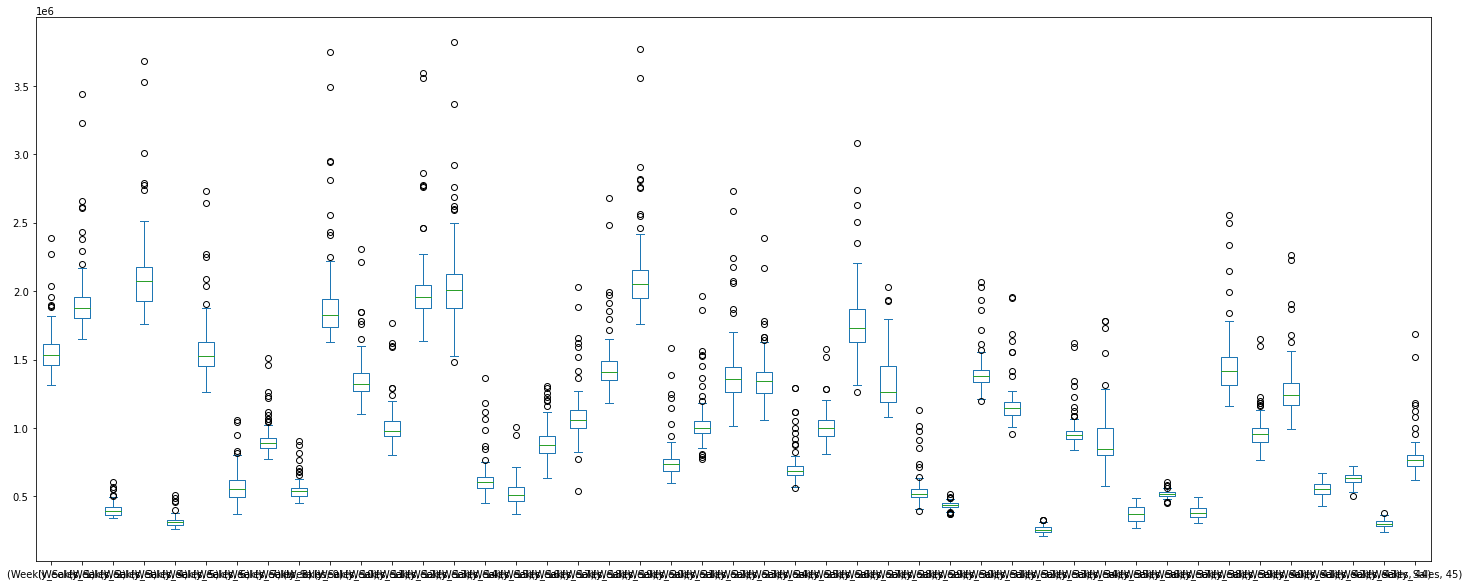

In [44]:
box_pv.plot.box(figsize=(25,10))

In [40]:
box_pv["Weekly_Sales", 1]

Date
01-04-2011   1495064.75
01-06-2012   1624477.58
01-07-2011   1488538.09
01-10-2010   1453329.50
02-03-2012   1688420.76
                ...    
30-07-2010   1371986.60
30-09-2011   1394561.83
30-12-2011   1497462.72
31-08-2012   1582083.40
31-12-2010   1367320.01
Name: (Weekly_Sales, 1), Length: 143, dtype: float64